MODEL TRAINING

Importing the libraries like -: pandas,numpy,matplotlib,seaborn
Importing the all regressor model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

Reading the csv file

In [3]:
df = pd.read_csv("stud.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
## FEATURE SELECTION 
X = df.drop("math score",axis = 1)
y = df["math score"]

In [6]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
## feature encoding and standard scaling
num_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)


In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
## train test ssplit
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [12]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

Create the model evaluation function

In [13]:
def evaluate(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    score = r2_score(true,predicted)
    return mse,mae,score

In [15]:
### model training
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Desicion Tree Regressor" : DecisionTreeRegressor(),
    "Random Froest Rgressor" : RandomForestRegressor(),
    "Xgboost regressor" : XGBRegressor(),
    "Adaboost Rgressor" : AdaBoostRegressor()
}
model_lst = []
R2_lst = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    ##Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## evaluating the model
    model_train_mse,model_train_mae,model_train_r2_score = evaluate(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_r2_score = evaluate(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_lst.append(list(models.keys())[i])

    print("model performance for training set")
    print("- mean squared error: {:.4f}".format(model_train_mse))
    print("- mean absolute error: {:.4f}".format(model_train_mae))
    print("- r2_score: {:.4f}".format(model_train_r2_score))

    print("-----------------------------------------------------")

    print("model performance for test set")
    print("- mean squared error: {:.4f}".format(model_test_mse))
    print("- mean absolute error: {:.4f}".format(model_test_mae))
    print("- r2_score: {:.4f}".format(model_test_r2_score))
    R2_lst.append(model_test_r2_score)

    print("="*35)
    print("\n")


Linear Regression
model performance for training set
- mean squared error: 28.2766
- mean absolute error: 4.2569
- r2_score: 0.8792
-----------------------------------------------------
model performance for test set
- mean squared error: 29.7541
- mean absolute error: 4.2982
- r2_score: 0.8575


Ridge
model performance for training set
- mean squared error: 28.1882
- mean absolute error: 4.2448
- r2_score: 0.8796
-----------------------------------------------------
model performance for test set
- mean squared error: 29.3374
- mean absolute error: 4.2825
- r2_score: 0.8595


Lasso
model performance for training set
- mean squared error: 43.6420
- mean absolute error: 5.1753
- r2_score: 0.8135
-----------------------------------------------------
model performance for test set
- mean squared error: 38.1447
- mean absolute error: 5.0135
- r2_score: 0.8174


K-Neighbors Regressor
model performance for training set
- mean squared error: 34.0334
- mean absolute error: 4.6380
- r2_score: 0

RESULTS

In [16]:
pd.DataFrame(list(zip(model_lst,R2_lst)),columns=["model name","r2_score"]).sort_values(by=["r2_score"],ascending=False)

,model name,r2_score
1,Ridge,0.859539
0,Linear Regression,0.857544
5,Random Froest Rgressor,0.838302
7,Adaboost Rgressor,0.822979
2,Lasso,0.817371
6,Xgboost regressor,0.800579
3,K-Neighbors Regressor,0.783747
4,Desicion Tree Regressor,0.711129


LINEAR REGRESION

In [18]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
score = r2_score(y_pred,y_test)*100
print(" accuracy of the model is %2.f" %score)

 accuracy of the model is 86


PLOTTING THE Y_PRED AND Y_TEST

Text(0, 0.5, 'predicted')

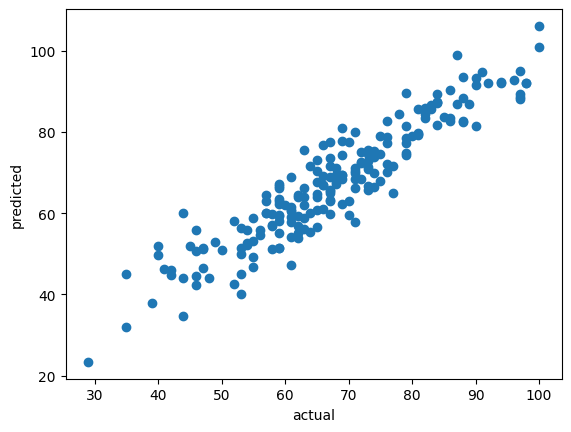

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

<Axes: xlabel='math score'>

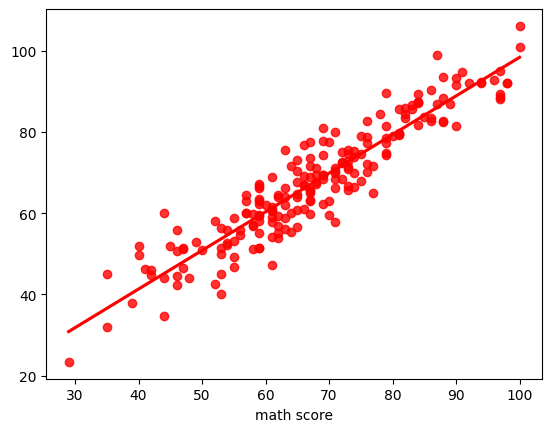

In [20]:
sns.regplot(x=y_test,y=y_pred,ci = None,color="red")

In [21]:
predicted_df = pd.DataFrame({"actual":y_test,"predicted":y_pred,"difference":y_test-y_pred})
predicted_df

,actual,predicted,difference
841,64,60.046875,3.953125
956,84,89.453125,-5.453125
544,64,55.359375,8.640625
173,63,62.125000,0.875000
759,69,81.125000,-12.125000
...,...,...,...
274,88,82.468750,5.531250
192,62,59.453125,2.546875
398,74,66.515625,7.484375
450,64,71.578125,-7.578125
